In [45]:

from sklearn import datasets
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier 
from sklearn import metrics  
import graphviz


In [46]:
dt_prin=pd.read_csv("titanic-passengers.csv", sep=";")
dt_prin.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


<h1>ANALYSE ET TRAITEMENT DES DONNEES<h1>

In [47]:
df=dt_prin.copy()

In [48]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


In [49]:
df.duplicated().sum()

0

In [50]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [51]:
df.drop(['Cabin','Name','PassengerId','Ticket'],axis=1,inplace=True)

In [52]:
df['Embarked'].fillna("S",inplace=True)


In [53]:
df['Age'].fillna(df['Age'].mean(),inplace=True)


In [54]:
df_tag=df['Survived'].copy()

In [55]:
df_tag=df_tag.map({"Yes": 1, "No": 0})  
df_tag.head()


0    0
1    0
2    0
3    0
4    0
Name: Survived, dtype: int64

In [56]:
df.drop('Survived',axis=1,inplace=True)

In [57]:
df= pd.get_dummies(df,drop_first=True)

In [58]:
df = pd.concat([df,df_tag],axis=1)

<AxesSubplot:>

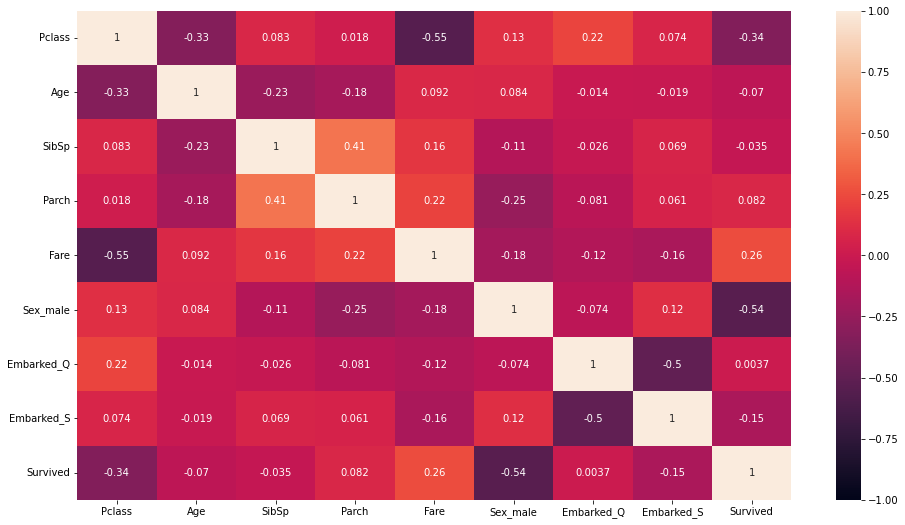

In [59]:
plt.figure(figsize=(16,9))
sns.heatmap(df.corr(),vmin=-1,vmax=1,annot=True)

<h1>CREATION D'UN ENSEMBLE D'APPRENTISSAGE ET TEST </h1>

In [60]:
x = df[['Pclass','Sex_male','Embarked_S','Age','Fare']]
y = df['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=0)  #splitting data with test size of 25%


<h1>APPLIQUATION DE L'ABRE DE DECISION</h1>

In [61]:
classifier = tree.DecisionTreeClassifier()
classifier.fit(x_train, y_train) 

DecisionTreeClassifier()

In [64]:
y_pred=classifier.predict(x_test)  

In [65]:
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.7910447761194029


<h1>REPRESENTATION GRAPHIQUE DE L'ABRE DE DECISION</h1>

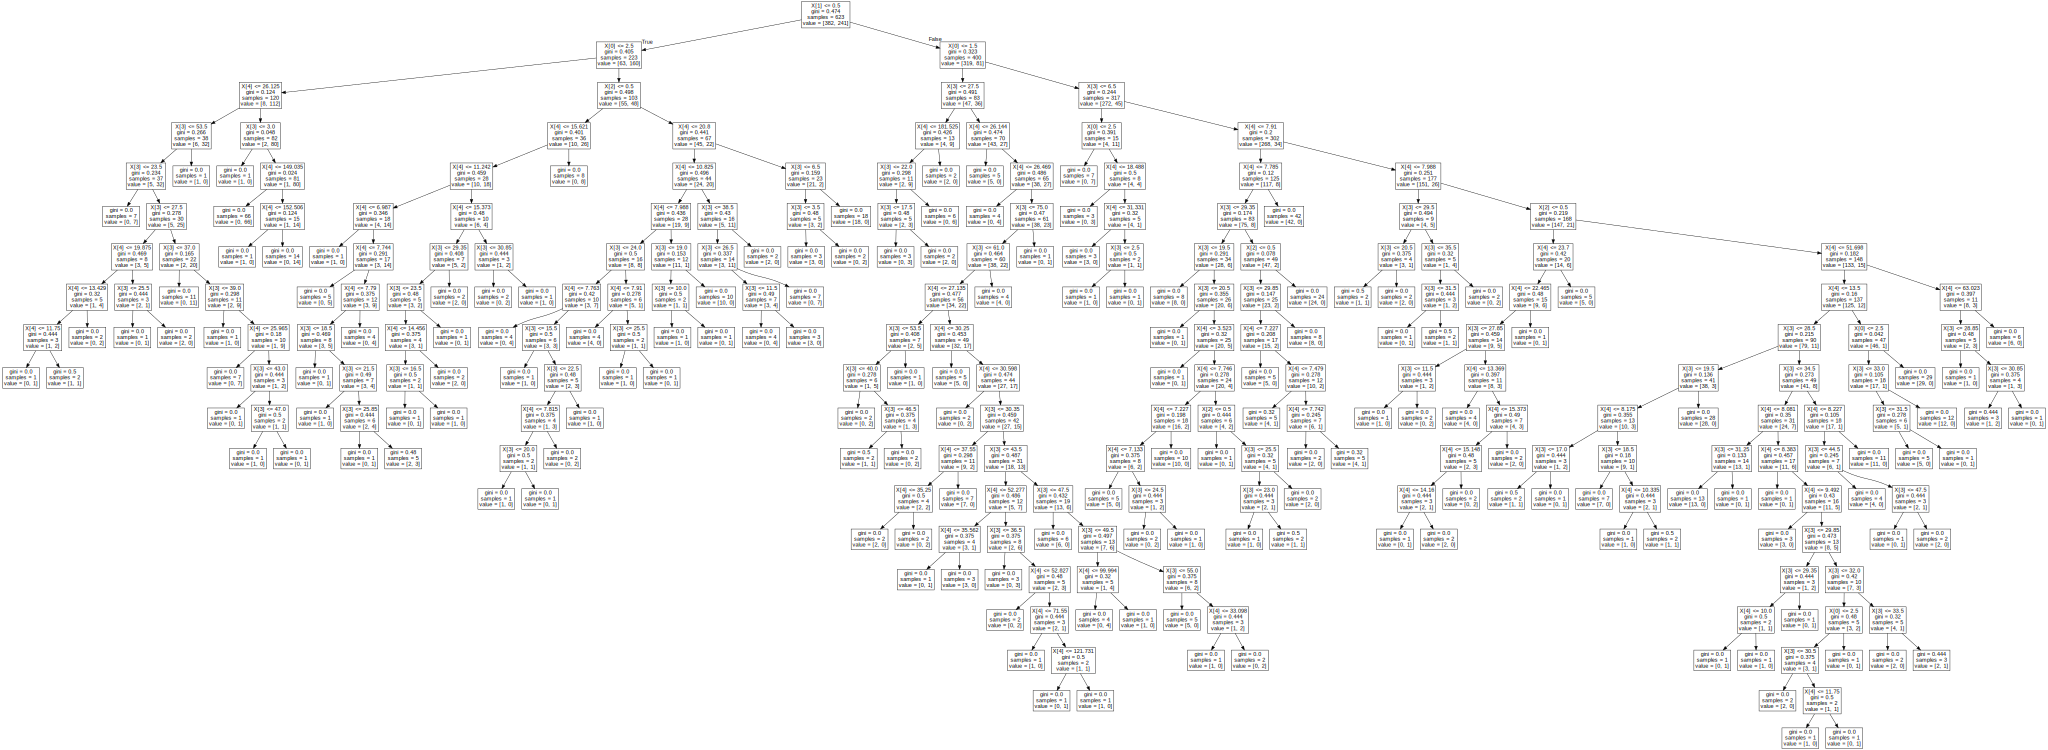

In [67]:
dot_data= tree.export_graphviz(classifier,out_file=None)
graph = graphviz.Source(dot_data)
graph.render("titanic-passengers.csv")
graph

<h1>MODIFICATION DES PARAMETRE DE L'ABRE DE DECISION </h1>

In [74]:
clf_params = DecisionTreeClassifier(criterion='gini',max_depth=6)

clf_params = clf_params.fit(x_train,y_train)



In [75]:
y_pred = clf.predict(x_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8208955223880597


<p>On constat que l'exatitude de notre model avec les paramettre ajouté est meilleur que celle sans les paramètre </p>

<h1>APPLICATION DU MODEL DE FORET ALEATOIRE</h1>

In [116]:
clf_foret=RandomForestClassifier(n_estimators=30)

In [117]:
clf_foret.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [118]:
y_pred=clf_foret.predict(x_test)  
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8134328358208955


<p>On constat que l'exatitude de notre model de forêt aleatoire est meilleur que celle de l'abre a decision avec et sans les paramètre </p>